# Hierarchical Clustering with Mean Shift Visualization

Hierarchical CLustering means the machine model itself will determine how many clusters there are.
Basically, eeach datapoint has a radius (or banwdidth - everything within that distance). Each point in that bandwidth is accounted for, and a mean is found. Bandwidths can have multiple levels and be weighted. A new bandwidth is created and the process repeats until the centroid doesn't move anymore. Convergence is when centroids that started at different points meet. Once all cluster centers are done moving, you're optimized.

Here, we will create a 3d dataset of blobs, and visualize mean shift clustering for a better understanding.

[[4.64841165 5.06135721 5.16091401]
 [0.6333356  0.96183611 0.65841015]
 [3.04496223 9.33510433 9.89030968]]
Number of estimated clusters: 3


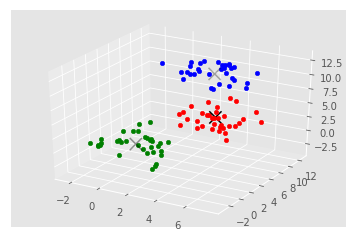

In [2]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]
#since blobs are made around these, cluster centers should be pretty close

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
#just multiplying by 10 to cycle through so in theory we could find 70 clusterss
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()